In [40]:
%load_ext autoreload
%autoreload 2
# import gen_data

import numpy as np
import pandas as pd
# import gen_data
import regex as re
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
industries = pd.read_csv('IndustryByState_2005-2021.csv').drop(columns=['GeoFips','LineCode'])
industries.loc[:,'Description'] = industries.loc[:,'Description'].apply(lambda x: x.strip())
industries = industries.set_index(['GeoName', 'Description']).mean(axis=1).reset_index('Description')
industries = industries.pivot(columns='Description',values=0)
industries.columns = industries.columns.to_list()
industries.index.rename('State', inplace=True)
industries = industries[['Information']].rename(columns = {'Information':'GDPcont_t0'})

spat = {"New England" : ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
 "Mideast" : ['Delaware','District of Columbia','Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
 "Great Lakes" : ['Illinois','Indiana','Michigan','Ohio','Wisconsin'],
 "Plains" : ['Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota', 'South Dakota'],
 "Southeast" : ['Alabama', 'Alabama', 'Arkansas', 'Florida','Georgia', 'Kentucky','Louisiana','Mississippi','North Carolina','South Carolina','Tennessee','Virginia','West Virginia'],
 "Southwest" : ['Arizona','New Mexico','Oklahoma','Texas'],
 "Rocky Mountain" : ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
 "Far West" : ['Alaska', 'California','Hawaii','Nevada','Oregon','Washington']}
spat_inv = {}
for region, states in spat.items():
    sub_dict = {state : region for state in states}
    spat_inv.update(sub_dict)
spat_inv

regions = industries.reset_index('State')['State'].apply(lambda x: spat_inv[x])
regions.index = industries.index
industries.loc[:,'Region'] = regions
industries.to_csv('IndustriesTechClean.csv')
industries.sort_values('GDPcont_t0', ascending=False)

,GDPcont_t0,Region
State,,
Washington,0.947419,Far West
California,0.709355,Far West
New York,0.465806,Mideast
Pennsylvania,0.418226,Mideast
Georgia,0.370968,Southeast
Connecticut,0.313871,New England
Utah,0.310000,Rocky Mountain
Colorado,0.268387,Rocky Mountain
Massachusetts,0.259516,New England


In [42]:
states = industries.reset_index().reset_index().rename(columns={'index':'state_int'})
regions = pd.DataFrame(pd.unique(industries.Region)).reset_index().rename(columns={'index':'region_int',0:'Region'})
loc_map = states.merge(regions, on = 'Region')
loc_map

,state_int,State,GDPcont_t0,Region,region_int
0,0,Alabama,0.039194,Southeast,0
1,3,Arkansas,0.047581,Southeast,0
2,9,Florida,0.192097,Southeast,0
3,10,Georgia,0.370968,Southeast,0
4,17,Kentucky,0.115323,Southeast,0
5,18,Louisiana,0.071774,Southeast,0
6,24,Mississippi,0.090161,Southeast,0
7,33,North Carolina,0.201129,Southeast,0
8,40,South Carolina,0.163548,Southeast,0
9,42,Tennessee,0.145323,Southeast,0


In [43]:
loc_map[['state_int', 'region_int', 'GDPcont_t0']].to_csv('location_sim_base.csv')
state_mat = pd.read_csv('location_sim_base.csv').to_numpy()[:,1:]

## Vanilla simulation: same treatment effects, same treatment year, no noise

In [44]:
import init_sim
init_mat = init_sim.init_sim(state_mat, 10, 5.0, 5.0, 0.0, 2.0, 0.0)
pd.DataFrame(init_mat)
#state_id, region_id, base_growth, treated_dummy, treated_year, treatment effect

,0,1,2,3,4,5
0,27.0,4.0,0.313871,NaN,NaN,2.0
1,42.0,6.0,0.110484,NaN,NaN,2.0
2,16.0,1.0,0.200968,1.0,5.0,2.0
3,25.0,3.0,0.310000,1.0,5.0,2.0
4,35.0,5.0,0.195000,1.0,5.0,2.0
5,8.0,0.0,0.163548,NaN,NaN,2.0
6,20.0,2.0,0.093548,1.0,5.0,2.0
7,45.0,7.0,-0.014839,1.0,5.0,2.0
8,10.0,0.0,0.155484,NaN,NaN,2.0
9,6.0,0.0,0.090161,NaN,NaN,2.0


In [45]:
import run_sim
simLong = run_sim.run_sim(init_mat, np.array([0,0,0,0,0,0,0,0]) / 800, 10, .3, .001, .2, .001, 0.5)

In [46]:
simLong_df = pd.DataFrame(simLong, columns=['state_int','t', 'stateControls_t', 'GDPcont_t'])
simLong_df = simLong_df.merge(loc_map, on = 'state_int')

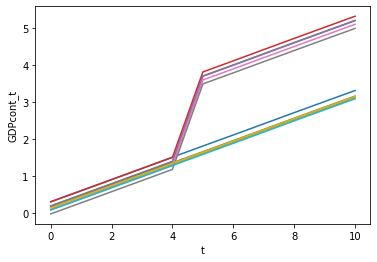

In [47]:
ax = sns.lineplot(data= simLong_df, x = 't', y = 'GDPcont_t', hue = 'State')
ax.legend().remove()
ax.figure.savefig('img/ideal_case.png')

In [48]:
import fit_model
data_out, labels, target = fit_model.preprocess_data(simLong, init_mat, 
                                    linear_time=True,
                                    treat_dummy_type=0)

In [49]:
import fit_model
fit_model.compute_OLS(data_out, target)[-1]

2.0009286581792423

## Real-er, staggered: same treatment effects, DIFFERENT treatment year, no noise

In [50]:
import init_sim
init_mat = init_sim.init_sim(state_mat, 10, 5.0, 5.0, 2.0, 2.0, 0.0)
pd.DataFrame(init_mat)
#state_id, region_id, base_growth, treated_dummy, treated_year, treatment effect

,0,1,2,3,4,5
0,11.0,0.0,0.071935,NaN,NaN,2.0
1,32.0,4.0,0.094516,NaN,NaN,2.0
2,10.0,0.0,0.155484,1.0,5.0,2.0
3,49.0,7.0,0.138548,1.0,7.0,2.0
4,50.0,7.0,0.123710,NaN,NaN,2.0
5,19.0,2.0,0.121129,1.0,3.0,2.0
6,22.0,3.0,0.268387,NaN,NaN,2.0
7,30.0,4.0,0.212742,1.0,2.0,2.0
8,6.0,0.0,0.090161,NaN,NaN,2.0
9,35.0,5.0,0.195000,1.0,4.0,2.0


In [51]:
import run_sim
simLong = run_sim.run_sim(init_mat, np.array([0,0,0,0,0,0,0,0]) / 800, 10, .3, .001, .2, .001, 0.5)

In [52]:
simLong_df = pd.DataFrame(simLong, columns=['state_int','t', 'stateControls_t', 'GDPcont_t'])
simLong_df = simLong_df.merge(loc_map, on = 'state_int')

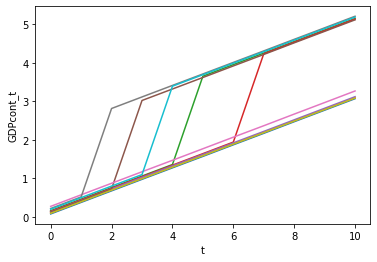

In [53]:
ax = sns.lineplot(data= simLong_df, x = 't', y = 'GDPcont_t', hue = 'State')
ax.legend().remove()
ax.figure.savefig('img/staggered_but_even.png')

In [54]:
import fit_model
data_out, labels, target = fit_model.preprocess_data(simLong, init_mat, 
                                    linear_time=True,
                                    treat_dummy_type=0)

In [55]:
import fit_model
fit_model.compute_OLS(data_out, target)[-1]

2.0007018056474135

## simultaneous but uneven: DIFFERENT treatment effects, SAME treatment year, no noise

In [56]:
import init_sim
init_mat = init_sim.init_sim(state_mat, 10, 5.0, 5.0, 0.0, 2.0, 1.0)
pd.DataFrame(init_mat)
#state_id, region_id, base_growth, treated_dummy, treated_year, treatment effect

,0,1,2,3,4,5
0,32.0,4.0,0.094516,1.0,5.0,0.913262
1,30.0,4.0,0.212742,NaN,NaN,2.285487
2,19.0,2.0,0.121129,1.0,5.0,2.759997
3,5.0,0.0,0.071774,1.0,5.0,2.202202
4,1.0,0.0,0.047581,NaN,NaN,2.510896
5,23.0,3.0,0.119355,1.0,5.0,2.721339
6,4.0,0.0,0.115323,NaN,NaN,3.154148
7,18.0,2.0,0.231129,NaN,NaN,1.632999
8,13.0,1.0,0.709355,NaN,NaN,2.186679
9,33.0,5.0,0.070968,1.0,5.0,2.491190


In [57]:
import run_sim
simLong = run_sim.run_sim(init_mat, np.array([0,0,0,0,0,0,0,0]) / 800, 10, .3, .001, .2, .001, 0.5)

In [58]:
simLong_df = pd.DataFrame(simLong, columns=['state_int','t', 'stateControls_t', 'GDPcont_t'])
simLong_df = simLong_df.merge(loc_map, on = 'state_int')

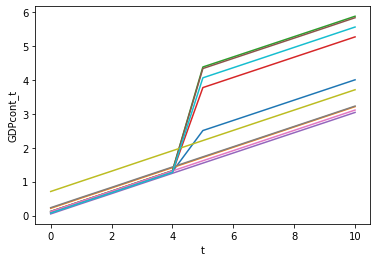

In [59]:
ax = sns.lineplot(data= simLong_df, x = 't', y = 'GDPcont_t', hue = 'State')
ax.legend().remove()
ax.figure.savefig('img/simultaneous_but_uneven.png')

In [60]:
import fit_model
data_out, labels, target = fit_model.preprocess_data(simLong, init_mat, 
                                    linear_time=True,
                                    treat_dummy_type=0)

In [61]:
import fit_model
fit_model.compute_OLS(data_out, target)[-1]

2.217227802218465

## Worse case and also most realistic: DIFFERENT treatment effects, DIFFERENT treatment year, no noise

In [62]:
import init_sim
init_mat = init_sim.init_sim(state_mat, 10, 5.0, 5.0, 2.0, 2.0, 1.0)
pd.DataFrame(init_mat)
#state_id, region_id, base_growth, treated_dummy, treated_year, treatment effect

,0,1,2,3,4,5
0,49.0,7.0,0.138548,1.0,2.0,1.762562
1,41.0,6.0,0.098226,NaN,NaN,1.833744
2,38.0,5.0,0.418226,1.0,2.0,0.267776
3,28.0,4.0,0.030484,NaN,NaN,2.782578
4,22.0,3.0,0.268387,NaN,NaN,2.326695
5,30.0,4.0,0.212742,NaN,NaN,1.738128
6,42.0,6.0,0.110484,1.0,5.0,1.729584
7,47.0,7.0,0.126774,1.0,6.0,3.027276
8,17.0,1.0,0.947419,NaN,NaN,2.613042
9,45.0,7.0,-0.014839,1.0,4.0,2.685515


In [63]:
import run_sim
simLong = run_sim.run_sim(init_mat, np.array([0,0,0,0,0,0,0,0]) / 800, 10, .3, .001, .2, .001, 0.5)

In [64]:
simLong_df = pd.DataFrame(simLong, columns=['state_int','t', 'stateControls_t', 'GDPcont_t'])
simLong_df = simLong_df.merge(loc_map, on = 'state_int')

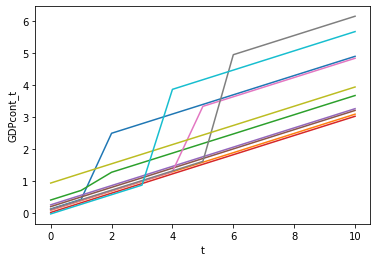

In [65]:
ax = sns.lineplot(data= simLong_df, x = 't', y = 'GDPcont_t', hue = 'State')
ax.legend().remove()
ax.figure.savefig('img/worst_case.png')

In [66]:
import fit_model
data_out, labels, target = fit_model.preprocess_data(simLong, init_mat, 
                                    linear_time=True,
                                    treat_dummy_type=0)

In [67]:
import fit_model
fit_model.compute_OLS(data_out, target)[-1]

2.0581121824591095